In [1]:
import pymongo
import pandas as pd
import numpy as np

from pymongo import MongoClient
from bson.objectid import ObjectId

import datetime

import matplotlib.pyplot as plt

from collections import defaultdict


%matplotlib inline
import json
plt.style.use('ggplot')

import seaborn as sns

from math import log10, floor

In [2]:
## Connect to local DB

client = MongoClient('localhost', 27017)
print ("Setup db access")

Setup db access


In [3]:
#
# Get collections from mongodb
#
#db = client.my_test_db
db = client.test


In [4]:
chunk = 500000
start = 0
end = start + chunk

In [5]:
#reponses = db.anon_student_task_responses.find({'correct':False})[start:end]
reponses = db.anon_student_task_responses.find()[start:end]

In [6]:
df_responses = pd.DataFrame(list(reponses))

In [7]:
print (df_responses.head())

                        _id               behavioral_traits  bonus  correct  \
0  5a00f1739100de1a390000d0                              []  False     True   
1  5a00f1739100de1a390000d5  [measuring_tools, orange_tick]  False     True   
2  5a00f1739100de1a390000d9                              []  False     True   
3  5a00f1739100de1a390000dc                              []  False     True   
4  5a00f1739100de1a390000df                              []  False     True   

       diff          id  incomplete         lesson  \
0  0.000000  nvrm82_9Yv       False       nline_1b   
1  0.563288  jVG3p9f-20       False       nline_1b   
2  0.601043  _NUUDSBMum       False  equivalence_0   
3  0.686276  B6HmMEMpoL       False  equivalence_0   
4  0.642014  IYWiIP26on       False  equivalence_0   

                                       level_summary  \
0  {'entered': True, 'path': 'nline_1b', 'lm_stat...   
1  {'entered': True, 'path': 'nline_1b', 'lm_stat...   
2  {'subject': 'fractions', 'uni

In [8]:
df_responses.shape

(500000, 27)

In [9]:
df2 = df_responses.join(pd.DataFrame(df_responses["student"].to_dict()).T)

In [10]:
df2 = df2.join(pd.DataFrame(df2['level_summary'].to_dict()).T)

In [11]:
df2 = df2.join(pd.DataFrame(df2['problems'].to_dict()).T)

In [12]:
df3  = df2.copy()

In [13]:
## Look act columns
print (df_responses.columns)

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched'],
      dtype='object')


In [14]:
## How many data samples
print (len(df_responses), "Number of entries")

500000 Number of entries


In [15]:
## Make 'description' a feature wih important words mapped

In [16]:
df3.columns

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched', 'grade',
       'mvt_group', 'mvt_group_code', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong'],
      dtype='object')

In [17]:
df3['percent_correct'] = df3['nright'].astype(float) / df3['ntotal']

In [18]:
df3.iloc[0]

_id                                              5a00f1739100de1a390000d0
behavioral_traits                                                      []
bonus                                                               False
correct                                                              True
diff                                                                    0
id                                                             nvrm82_9Yv
incomplete                                                          False
lesson                                                           nline_1b
level_summary           {'entered': True, 'path': 'nline_1b', 'lm_stat...
problem_set             lessons/fractions/lesson13_1/part_a/media/prob...
problem_set_id                                                 _Pd6uU3viE
problem_set_subspace                                                parta
qual_id                                       _Pd6uU3viE.parta.nvrm82_9Yv
randomly_selected                     

In [19]:
for idx in range(100):
    print ('index"', idx)
    print (df3.iloc[idx]['lesson'])
    print (df3.iloc[idx]['response'])

index" 0
nline_1b
{'fraction_cblock_chains': [{'right': 442, 'sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}, 'pieces': ['1/2'], 'left': 97, 'lcm_sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}}], 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/start_marker.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/dog.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf'}], 'den': '2', 'fraction_input_value': '1/2', 'num': '1', 'fraction_cblock_total_count': 1, 'numberline_associations': [[]], 'fraction_cblock_counts': {'1/2': 1}, 'fraction_cblock_containment': {}, 'whole': ''}
index" 1
nline_1b
{'fraction_cblock_total_count': 4, 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/panda.swf'}, {'total': 1

In [20]:
def stringify_response(resp):
    my_val = str(resp).replace("': ","_")
    my_val = my_val.replace("_{"," ")
    my_val = my_val.replace("_[",", ")
    for c in [']','[','{','}',"'","",","]:
        my_val = my_val.replace(c,'')
    return my_val


In [21]:
stringify_response(df3.iloc[0]['response'])

'fraction_cblock_chains right_442 sum numerator_1 denominator_2 __as3_type_Fraction pieces 1/2 left_97 lcm_sum numerator_1 denominator_2 __as3_type_Fraction plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/dog.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf den_2 fraction_input_value_1/2 num_1 fraction_cblock_total_count_1 numberline_associations  fraction_cblock_counts 1/2_1 fraction_cblock_containment  whole_'

In [22]:
df3['response_str'] = df3['response'].apply(stringify_response)

In [23]:
for idx in range(20):
    print (idx, df3['response_str'].iloc[idx])

0 fraction_cblock_chains right_442 sum numerator_1 denominator_2 __as3_type_Fraction pieces 1/2 left_97 lcm_sum numerator_1 denominator_2 __as3_type_Fraction plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/dog.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf den_2 fraction_input_value_1/2 num_1 fraction_cblock_total_count_1 numberline_associations  fraction_cblock_counts 1/2_1 fraction_cblock_containment  whole_
1 fraction_cblock_total_count_4 plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/objects/panda.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf input_4 fraction_cblock_chains right_856 sum numerator_1 denominator_1 __as3_type_Fraction pieces 1/4 1/4 1/4 1/4 left_165 lcm_sum numerator_4 denomina

In [24]:
df3.columns

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched', 'grade',
       'mvt_group', 'mvt_group_code', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong', 'percent_correct', 'response_str'],
      dtype='object')

In [25]:
## In Response:
### convert K, V, and all K_V into words in a text doc
### Then add text
### The add description


In [26]:
def make_string_from_list(key, elem_list):
    # Append key to each item in list
    ans = ''
    for elem in elem_list:
        ans += key + '_' + elem 
        
        

        
    

def make_string(elem, key=None, top=True):
    ans = ''
    if not elem:
        return ans
    if top:
        top = False
        top_keys = []
        for idx in range(len(elem.keys())):
            top_keys.append(True)
            
    for idx, key in enumerate(elem.keys()):
        if top_keys[idx]:
            top = True
            top_keys[idx] = False
            ans += ' '
        else:
            top = False
        #print ('ans = ', ans)
        #print (type(elem[key]))
        if type(elem[key]) is str or\
                type(elem[key]) is int:
            #print ('add value', elem[key])
            value = str(elem[key])
            #ans += key + '_' + value + ' ' + value + ' '
            ans += key + '_' + value + ' '
        elif type(elem[key]) is list:
            #print ('add list', elem[key])
            temp_elem = dict()
            for item in elem[key]:
                temp_elem[key] = item
                ans += make_string(temp_elem, top) 
        elif type(elem[key]) is dict:
            #print ('add dict', elem[key])
            for item_key in elem[key].keys():
                temp_elem = dict()
                temp_elem[item_key] = elem[key][item_key]
                ans += key + '_' + make_string(temp_elem, top)
        elif type(elem[key]) is float:
            #print ('add dict', elem[key])
            sig = 2
            value = elem[key]
            value = round(value, sig-int(
            floor(log10(abs(value))))-1)
            value = str(value)
            #ans += key + '_' + value + ' ' + value + ' '
            ans += key + '_' + value + ' '
        # ans += ' ' + key + ' '
        #print ('not handled', elem[key])
     
        
    return ans
        
            
        
            
            

In [27]:
df3['response_doc'] = df3['response'].map(make_string)

In [28]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x + ' ')

In [29]:
# df3['response_doc'] = df3['response_doc'] + df3['txt'] 

In [30]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x + ' ')

In [31]:
# df3['response_doc'] = df3['response_doc'] +  df3['description']

In [32]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x.replace("\n", ""))

In [33]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x.replace("?", " "))

In [34]:
df3.iloc[100]['response_doc']

' radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets/cms/wootmath_fractions/equal_parts/sixths/sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets/cms/wootmath_fractions/equal_parts/sixths/sixth_06.swf plain_image_groups_ total_1   '

In [35]:
df3.iloc[100]['response']

{'plain_image_groups': [{'total': 1,
   'url': 'assets/cms/wootmath_fractions/equal_parts/sixths/sixth_15.swf'},
  {'total': 1,
   'url': 'assets/cms/wootmath_fractions/equal_parts/sixths/sixth_06.swf'}],
 'radio_group_mc1': {'choice': 'B', 'text': 'No'},
 'radio_group_mc2': {'choice': 'A', 'text': 'Yes'}}

In [36]:
df3.iloc[100]

_id                                              5a00f1739100de1a390001fa
behavioral_traits                                                      []
bonus                                                               False
correct                                                              True
diff                                                             0.304348
id                                                             Z3I2H8eOfO
incomplete                                                          False
lesson                                                      parts_whole_1
level_summary           {'subject': 'fractions', 'path': 'parts_whole_...
problem_set             lessons/fractions/lesson07/eq_parts/media/prob...
problem_set_id                                                 6nBHKepQ3Y
problem_set_subspace                                                 set2
qual_id                                        6nBHKepQ3Y.set2.Z3I2H8eOfO
randomly_selected                     

In [37]:
for idx in range(20):
    print (idx, df3['response_doc'].iloc[idx])

0   fraction_cblock_chains_ right_442 fraction_cblock_chains_ sum_ numerator_1 sum_ denominator_2 sum_ __as3_type_Fraction fraction_cblock_chains_  pieces_1/2 fraction_cblock_chains_ left_97 fraction_cblock_chains_ lcm_sum_ numerator_1 lcm_sum_ denominator_2 lcm_sum_ __as3_type_Fraction   plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/objects/dog.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf  den_2  fraction_input_value_1/2  num_1  fraction_cblock_total_count_1    fraction_cblock_counts_ 1/2_1   whole_   
1  fraction_cblock_total_count_4   plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/n

In [38]:
df3['response_doc'] = df3['response_doc'].map( lambda x: " ".join(x.split('/')) if '/' in x else x)

In [39]:
df3.iloc[100]['response_doc']

' radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_06.swf plain_image_groups_ total_1   '

In [40]:
df3['response_doc'] = df3['response_doc'].map( lambda x: x.replace('[',' '))
df3['response_doc'] = df3['response_doc'].map( lambda x: x.replace(']',' '))

In [41]:
df3.iloc[100]['response_doc']

' radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_06.swf plain_image_groups_ total_1   '

In [42]:
docs = list(df3['response_doc'])

In [43]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [44]:
data_samples = docs

In [45]:
n_features = 1000
n_samples = len(data_samples)
n_topics = 50
n_top_words = 20

In [46]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')

Extracting tf-idf features for NMF...


In [47]:
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


done in 35.189s.


In [48]:
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


Extracting tf features for LDA...
done in 34.828s.


In [49]:
n_features = 1000
n_samples = len(data_samples)
n_topics = 100
n_top_words = 30

In [50]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


Extracting tf-idf features for NMF...
done in 32.818s.
Extracting tf features for LDA...
done in 37.269s.


In [51]:

from sklearn.cluster import KMeans, MiniBatchKMeans
true_k = 100

km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, random_state=42)

In [52]:
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(tf)
print("done in %0.3fs" % (time() - t0))
print()

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10,
        n_clusters=100, n_init=1, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)
done in 5.049s



In [53]:
print("Top terms per cluster:")


order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tf_vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :30]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: whole_ fraction_input_value_ fraction bitmap_text_inputs_ bitmap_text_interp_ input_a_ num_2 input_a_1 12 fraction_input_value_2 problem_text_1 10 num_1 input_ den_6 fraction_input_value_1 num_3 den_4 den_8 15 input_a_2 num_5 num_4 fraction_input_value_3 den_3 den_15 fraction_input_value_4 fraction_input_value_5 den_5 input_a_3
Cluster 1: fraction_cblock_chains_ lcm_sum_ sum_ pieces_1 __as3_type_fraction 10 numerator_1 denominator_1 denominator_10 denominator_7 fraction_cblock_counts_ unit2_ left_80 fraction_cblock_containment_ denominator_2 right_770 numerator_5 unit1_ denominator_8 denominator_5 1_2 fraction denominator_9 bar1_ numerator_9 left_100 numerator_3 left_145 right_276 left_277
Cluster 2: fraction_cblock_chains_ lcm_sum_ sum_ pieces_1 __as3_type_fraction numerator_1 fraction_cblock_counts_ denominator_1 bar1_ fraction denominator_8 numerator_3 fraction_cblock_containment_ numerator_22 denominator_4 1_ numerator_2 denominator_6 denominator_3

In [54]:
len(km.labels_)

500000

In [55]:
np.bincount(km.labels_)

array([55525,  1105,  4141,     0,   537,  6476,   725,  4512,  3239,
        7436,  9493,  5460,  2326,  1980,  8879,  6268,   558,  1238,
        1005,   624,  1536,  2767,  3681,  7281,  5502,  3161,  6861,
        2828, 10346,  2227,   804,  4891,  2079,  4057,   281,  3254,
        6517,  1264,  1210,  1452, 18638,  1191,  6929,  1214,  1246,
        1890,  1699,  2313,  3861,  1883,  2534,  3600,  7351,  1948,
        2315,  1560,  4988,  1867, 13349,  2381,  1991,  1481,   690,
        5168,  5875,  1704,  7239,     0, 66243,  4976,  6206,  5047,
        7981,  2796,  1077,  5667,  4263,  6362,  2850,   505,  3004,
       17737,  3695,  1018,  4404,  1052,   988,  3196,  3678,  7224,
        8509,  1331,     0,  3156,  1898, 11025,   461,  9420,  3800])

In [56]:
df3['cluster_100'] = km.labels_

In [57]:
len(np.bincount(km.labels_))

99

In [58]:
df3['cluster_100'] = km.labels_


In [59]:
df3['trait_1'] = df3['behavioral_traits'].apply(lambda x : x[0] if len(x) > 0 else 'None' )

In [60]:
df3['trait_2'] = df3['behavioral_traits'].apply(lambda x : x[1] if len(x) > 1 else 'None' ) 

In [61]:
df3['trait_1'].value_counts()

None                             359745
inverts_numerator_denominator     23257
how_to_model                      22164
identifying_gt_lt                 13676
counting_hops_not_ticks            6166
recognizing_the_whole              6132
starting_from_0_nline              5617
deci_understanding_gt_lt           5594
deci_incorrect_inequality          5258
inequality_symbol                  4789
partially_drawn_parts              4782
measuring_tools                    3529
partitioning_number_line           3514
dragging_to_add                    3295
modeled_incorrect_comparison       3047
comparing_frac_gt_lt               2438
deci_placing_decimal_points        1907
simplifying_bars_2                 1901
misplaced_fraction_part_nline      1868
fraction_of_set                    1707
deci_hops_instead_ticks            1469
hops_vs_ticks                      1398
simplifying_subtraction            1248
deci_tens_vs_tenths                1240
nline_as_whole                     1239


In [62]:
df3['trait_2'].value_counts()

None                            478767
equally_sized_parts               4782
orange_tick                       3529
wrong_number_parts                3514
modeled_incorrect_numerator       3047
simplifying_mixed_numbers         2613
simplifying_answers_nline         1658
deci_break_tenths_hundredths       877
nline_restart_one                  564
dragging_to_add_3_circles          544
modulo_ans                         105
Name: trait_2, dtype: int64

In [63]:
df_cluster_100 = df3.groupby('cluster_100')

In [64]:
len(df_cluster_100)

96

In [65]:
#df_cluster_100.head()

,_id,behavioral_traits,bonus,correct,diff,id,incomplete,lesson,level_summary,problem_set,...,nright,ntotal,nuntouched,nwrong,percent_correct,response_str,response_doc,cluster_100,trait_1,trait_2
0,5a00f1739100de1a390000d0,[],False,True,0.000000,nvrm82_9Yv,False,nline_1b,"{'entered': True, 'path': 'nline_1b', 'lm_stat...",lessons/fractions/lesson13_1/part_a/media/prob...,...,9,9,0,0,1.000000,fraction_cblock_chains right_442 sum numerator...,fraction_cblock_chains_ right_442 fraction_c...,28,None,None
1,5a00f1739100de1a390000d5,"[measuring_tools, orange_tick]",False,True,0.563288,jVG3p9f-20,False,nline_1b,"{'entered': True, 'path': 'nline_1b', 'lm_stat...",lessons/fractions/lesson13_1/part_b/media/prob...,...,9,9,0,0,1.000000,fraction_cblock_total_count_4 plain_image_grou...,fraction_cblock_total_count_4 plain_image_g...,8,measuring_tools,orange_tick
2,5a00f1739100de1a390000d9,[],False,True,0.601043,_NUUDSBMum,False,equivalence_0,"{'subject': 'fractions', 'unit_name': 'frac_eq...",lessons/fractions/lesson22_4/part_a/media/prob...,...,9,9,0,0,1.000000,fraction_cblock_chains left_176 lcm_sum numera...,fraction_cblock_chains_ left_176 fraction_cb...,66,None,None
3,5a00f1739100de1a390000dc,[],False,True,0.686276,B6HmMEMpoL,False,equivalence_0,"{'subject': 'fractions', 'unit_name': 'frac_eq...",lessons/fractions/lesson22_4/part_a/media/prob...,...,9,9,0,0,1.000000,fraction_cblock_chains left_176 lcm_sum numera...,fraction_cblock_chains_ left_176 fraction_cb...,77,None,None
4,5a00f1739100de1a390000df,[],False,True,0.642014,IYWiIP26on,False,equivalence_0,"{'subject': 'fractions', 'unit_name': 'frac_eq...",lessons/fractions/lesson22_4/part_b/media/prob...,...,9,9,0,0,1.000000,fraction_circle_containment Fraction 1/2 lcm_s...,fraction_circle_containment_ Fraction 1 2_ ...,52,None,None
5,5a00f1739100de1a390000e2,[],False,True,0.000000,bUoNJIVgJi,False,review_lesson_4,"{'subject': 'review', 'unit_name': '', 'title'...",lessons/fractions/lesson12/sets_large/media/pr...,...,1,4,1,3,0.250000,image_object_groups total_6 on_3 url_assets/ob...,image_object_groups_ total_6 image_object_gr...,95,None,None
6,5a00f1739100de1a390000e7,[],False,False,0.284006,39Y1vECA2c,False,review_lesson_4,"{'subject': 'review', 'unit_name': '', 'title'...",lessons/fractions/lesson10/quarters_ab/quarter...,...,1,4,1,3,0.250000,None,,68,None,None
7,5a00f1739100de1a390000ea,[],False,False,0.168491,faYl5HT_Sn,False,review_lesson_4,"{'subject': 'review', 'unit_name': '', 'title'...",lessons/fractions/lesson11/thirds/media/proble...,...,0,3,4,3,0.000000,None,,68,None,None
8,5a00f1739100de1a390000ed,[],False,True,0.397506,jzC49--8x7,False,model_symbol_6,"{'type': 'lesson', 'mastery': {'mean': 0.78899...",lessons/fractions/lesson08_3/part_a/media/prob...,...,8,8,0,0,1.000000,fraction_circle_groups x_512 scale_1 chains pi...,fraction_circle_groups_ x_512 fraction_circl...,31,None,None
9,5a00f1739100de1a390000f0,[],False,True,1.000000,hxS1eqLik1,False,model_symbol_6,"{'type': 'lesson', 'mastery': {'mean': 0.78899...",lessons/fractions/lesson08_3/part_b/media/prob...,...,8,8,0,0,1.000000,fraction_circle_groups x_512 scale_0.999999999...,fraction_circle_groups_ x_512 fraction_circl...,52,None,None


In [66]:
df_pcorrect = df3['percent_correct'].groupby(df3['cluster_100']).describe()

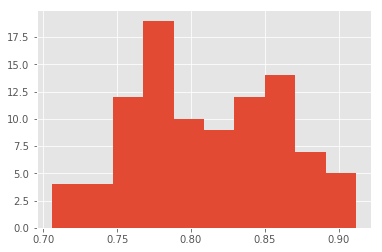

In [67]:
df_pcorrect['mean'].hist()

In [68]:
df_correct = df3['correct'].groupby(df3['cluster_100']).mean()

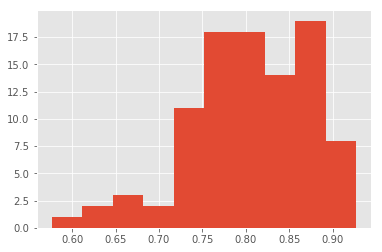

In [69]:
df_correct.hist()

In [70]:
df_true = df3[df3['correct']==True]
df_correctx_true = df_true['percent_correct']

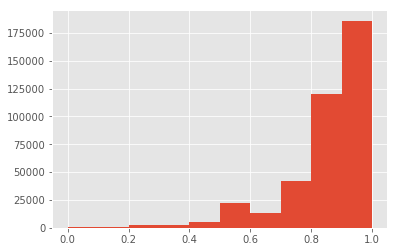

In [71]:
df_correctx_true.hist()

In [72]:
df_false = df3[df3['correct']!=True]
df_correctx_false = df_false['percent_correct']

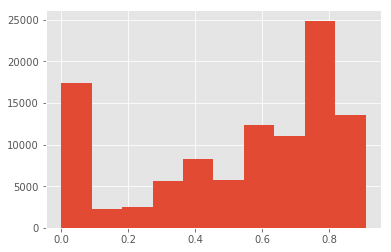

In [73]:
df_correctx_false.hist()

In [74]:
df_trait_1 = df3.groupby(['cluster_100', 'trait_1']).size().unstack(fill_value=0)

In [75]:
df_trait_2 = df3.groupby(['cluster_100', 'trait_2']).size().unstack(fill_value=0)

In [76]:
df_trait_2

trait_2,None,deci_break_tenths_hundredths,dragging_to_add_3_circles,equally_sized_parts,modeled_incorrect_numerator,modulo_ans,nline_restart_one,orange_tick,simplifying_answers_nline,simplifying_mixed_numbers,wrong_number_parts
cluster_100,,,,,,,,,,,
0,52073,0,0,0,0,81,0,0,5,0,3366
1,1070,0,0,0,35,0,0,0,0,0,0
2,4117,0,0,0,20,0,1,3,0,0,0
4,388,0,59,0,0,0,0,0,0,90,0
5,6468,0,0,0,0,0,0,0,0,8,0
6,725,0,0,0,0,0,0,0,0,0,0
7,4511,0,0,0,0,0,0,0,0,1,0
8,358,0,0,0,0,0,0,2881,0,0,0
9,7427,0,0,0,0,0,0,0,0,9,0


In [77]:
df_trait_2.columns

Index(['None', 'deci_break_tenths_hundredths', 'dragging_to_add_3_circles',
       'equally_sized_parts', 'modeled_incorrect_numerator', 'modulo_ans',
       'nline_restart_one', 'orange_tick', 'simplifying_answers_nline',
       'simplifying_mixed_numbers', 'wrong_number_parts'],
      dtype='object', name='trait_2')

In [78]:
df_trait_1.columns

Index(['None', 'area_model', 'benchmark_1_2', 'benchmark_quarters',
       'comparing_frac_gt_lt', 'counting_hops_for_division',
       'counting_hops_not_ticks', 'deci_add_to_model',
       'deci_break_tenths_hundredths', 'deci_building_tenths',
       'deci_compare_no_models', 'deci_forgot_decimal_point',
       'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths',
       'deci_incorrect_inequality', 'deci_placing_decimal_points',
       'deci_point_location_correct', 'deci_tens_vs_tenths',
       'deci_understanding_gt_lt', 'determine_the_frac_part',
       'dragging_to_add', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model',
       'identifying_gt_lt', 'inequality_symbol',
       'inverts_numerator_denominator', 'measuring_tools',
       'misplaced_fraction_part_nline', 'mixed_number_quotient',
       'mixed_numbers_on_number_line', 'modeled_incorrect_comparison',
       'modeling_fraction_division', 'multiplication',
       'multiplying_whole_by_proper', 'nline_as_whole',
     

In [79]:
[x for x in df_trait_2.columns if x not in df_trait_1.columns ]

['dragging_to_add_3_circles',
 'equally_sized_parts',
 'modeled_incorrect_numerator',
 'modulo_ans',
 'nline_restart_one',
 'orange_tick',
 'simplifying_answers_nline',
 'wrong_number_parts']

In [80]:
[x for x in df_trait_1.columns if x not in df_trait_2.columns ]

['area_model',
 'benchmark_1_2',
 'benchmark_quarters',
 'comparing_frac_gt_lt',
 'counting_hops_for_division',
 'counting_hops_not_ticks',
 'deci_add_to_model',
 'deci_building_tenths',
 'deci_compare_no_models',
 'deci_forgot_decimal_point',
 'deci_hops_instead_ticks',
 'deci_hundredths_vs_tenths',
 'deci_incorrect_inequality',
 'deci_placing_decimal_points',
 'deci_point_location_correct',
 'deci_tens_vs_tenths',
 'deci_understanding_gt_lt',
 'determine_the_frac_part',
 'dragging_to_add',
 'fraction_of_set',
 'hops_vs_ticks',
 'how_to_model',
 'identifying_gt_lt',
 'inequality_symbol',
 'inverts_numerator_denominator',
 'measuring_tools',
 'misplaced_fraction_part_nline',
 'mixed_number_quotient',
 'mixed_numbers_on_number_line',
 'modeled_incorrect_comparison',
 'modeling_fraction_division',
 'multiplication',
 'multiplying_whole_by_proper',
 'nline_as_whole',
 'numerator_off_by_one_nline',
 'only_tenths_entered',
 'partially_drawn_parts',
 'partitioning_number_line',
 'recognizing

In [81]:
#df_trait_1 = df_trait_1.drop('None', axis=1)
#df_trait_2 = df_trait_2.drop('None', axis=1)

In [82]:
df_traits = pd.merge(left=df_trait_1,right=df_trait_2, how='left' )


In [83]:
df_trait_1.index.rename('cluster_100', inplace=True)

In [84]:
df_trait_2.index.rename('cluster_100', inplace=True)

In [85]:
df_traits.columns

Index(['None', 'area_model', 'benchmark_1_2', 'benchmark_quarters',
       'comparing_frac_gt_lt', 'counting_hops_for_division',
       'counting_hops_not_ticks', 'deci_add_to_model',
       'deci_break_tenths_hundredths', 'deci_building_tenths',
       'deci_compare_no_models', 'deci_forgot_decimal_point',
       'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths',
       'deci_incorrect_inequality', 'deci_placing_decimal_points',
       'deci_point_location_correct', 'deci_tens_vs_tenths',
       'deci_understanding_gt_lt', 'determine_the_frac_part',
       'dragging_to_add', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model',
       'identifying_gt_lt', 'inequality_symbol',
       'inverts_numerator_denominator', 'measuring_tools',
       'misplaced_fraction_part_nline', 'mixed_number_quotient',
       'mixed_numbers_on_number_line', 'modeled_incorrect_comparison',
       'modeling_fraction_division', 'multiplication',
       'multiplying_whole_by_proper', 'nline_as_whole',
     

In [86]:
df_traits = pd.concat([df_trait_1, df_trait_2], axis=1)

In [87]:
print (df_traits.shape)
print (df_trait_1.shape)
print (df_trait_2.shape)


(96, 62)
(96, 51)
(96, 11)


In [88]:
df_traits.columns

Index(['None', 'area_model', 'benchmark_1_2', 'benchmark_quarters',
       'comparing_frac_gt_lt', 'counting_hops_for_division',
       'counting_hops_not_ticks', 'deci_add_to_model',
       'deci_break_tenths_hundredths', 'deci_building_tenths',
       'deci_compare_no_models', 'deci_forgot_decimal_point',
       'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths',
       'deci_incorrect_inequality', 'deci_placing_decimal_points',
       'deci_point_location_correct', 'deci_tens_vs_tenths',
       'deci_understanding_gt_lt', 'determine_the_frac_part',
       'dragging_to_add', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model',
       'identifying_gt_lt', 'inequality_symbol',
       'inverts_numerator_denominator', 'measuring_tools',
       'misplaced_fraction_part_nline', 'mixed_number_quotient',
       'mixed_numbers_on_number_line', 'modeled_incorrect_comparison',
       'modeling_fraction_division', 'multiplication',
       'multiplying_whole_by_proper', 'nline_as_whole',
     

In [89]:
df_traits = df_traits.groupby(df_traits.columns, axis=1).sum()

In [90]:
df_traits

,None,area_model,benchmark_1_2,benchmark_quarters,comparing_frac_gt_lt,counting_hops_for_division,counting_hops_not_ticks,deci_add_to_model,deci_break_tenths_hundredths,deci_building_tenths,...,simplifying_bars_2,simplifying_fractions,simplifying_mixed_numbers,simplifying_mixed_numbers_2,simplifying_subtraction,simplifying_with_bars,starting_from_0_nline,using_bars_in_division,using_correct_piece,wrong_number_parts
cluster_100,,,,,,,,,,,,,,,,,,,,,
0,79757,0,0,0,1394,0,0,0,0,0,...,0,44,0,2,0,0,0,0,0,3366
1,1971,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,111,0,7,4,0
2,7972,0,0,0,9,0,0,0,0,0,...,3,0,0,1,0,0,0,10,4,0
4,581,0,0,0,0,0,0,0,0,0,...,0,0,149,0,0,0,0,0,0,0
5,9015,0,0,0,0,0,0,0,0,0,...,0,1,8,46,66,0,0,0,0,0
6,1450,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7230,0,0,0,0,0,0,0,0,0,...,0,0,1,2,0,0,0,0,0,0
8,716,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,13676,0,0,0,0,0,0,0,0,0,...,0,0,9,0,0,0,0,0,0,0


In [91]:
df_traits = df_traits.drop('None', axis=1)

In [92]:
df_traits

,area_model,benchmark_1_2,benchmark_quarters,comparing_frac_gt_lt,counting_hops_for_division,counting_hops_not_ticks,deci_add_to_model,deci_break_tenths_hundredths,deci_building_tenths,deci_compare_no_models,...,simplifying_bars_2,simplifying_fractions,simplifying_mixed_numbers,simplifying_mixed_numbers_2,simplifying_subtraction,simplifying_with_bars,starting_from_0_nline,using_bars_in_division,using_correct_piece,wrong_number_parts
cluster_100,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1394,0,0,0,0,0,0,...,0,44,0,2,0,0,0,0,0,3366
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,111,0,7,4,0
2,0,0,0,9,0,0,0,0,0,0,...,3,0,0,1,0,0,0,10,4,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,149,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,2,...,0,1,8,46,66,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,9,0,0,0,0,0,0,0


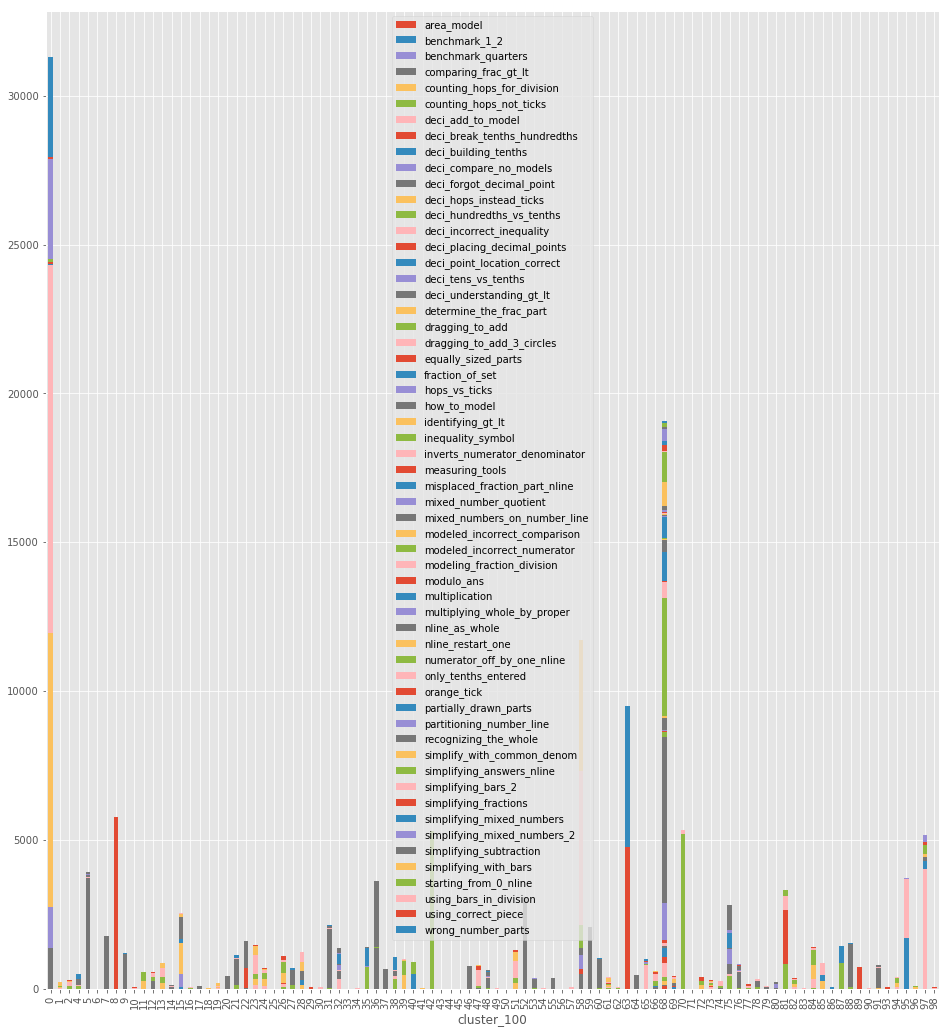

In [189]:
df_traits.plot.bar(stacked=True, figsize=(16,18), legend=False)

In [93]:
import seaborn as sns

In [94]:
df_traits_dict = df_traits.to_dict()

In [95]:
df_traits_dict_cluster = df_traits.transpose().to_dict()

In [96]:
df_traits_dict_cluster_no0 = {}
for cluster, trait_dict in df_traits_dict_cluster.items():
    # print (cluster, trait_dict)
    df_traits_dict_cluster_no0[cluster] = { k:v for k,v in trait_dict.items() if v != 0}

In [97]:
df_traits_dict_cluster_no0[88]

{'comparing_frac_gt_lt': 2,
 'dragging_to_add': 52,
 'how_to_model': 1321,
 'inverts_numerator_denominator': 12,
 'recognizing_the_whole': 122,
 'simplifying_mixed_numbers': 40}

In [98]:
df_traits_dict_cluster_no0[40]

{'misplaced_fraction_part_nline': 517, 'simplifying_answers_nline': 376}

In [99]:
print (sorted(list(df_traits.columns)))

['area_model', 'benchmark_1_2', 'benchmark_quarters', 'comparing_frac_gt_lt', 'counting_hops_for_division', 'counting_hops_not_ticks', 'deci_add_to_model', 'deci_break_tenths_hundredths', 'deci_building_tenths', 'deci_compare_no_models', 'deci_forgot_decimal_point', 'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths', 'deci_incorrect_inequality', 'deci_placing_decimal_points', 'deci_point_location_correct', 'deci_tens_vs_tenths', 'deci_understanding_gt_lt', 'determine_the_frac_part', 'dragging_to_add', 'dragging_to_add_3_circles', 'equally_sized_parts', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model', 'identifying_gt_lt', 'inequality_symbol', 'inverts_numerator_denominator', 'measuring_tools', 'misplaced_fraction_part_nline', 'mixed_number_quotient', 'mixed_numbers_on_number_line', 'modeled_incorrect_comparison', 'modeled_incorrect_numerator', 'modeling_fraction_division', 'modulo_ans', 'multiplication', 'multiplying_whole_by_proper', 'nline_as_whole', 'nline_restart_one', 'numer

In [100]:
temp = (sorted(list(df_traits.columns)))
for idx, x in enumerate(temp):
    if idx > 0:
        if x == temp[idx - 1]:
            print (x)

In [101]:
#df_traits_norm = (df_traits - df_traits.mean()) / (df_traits.max() - df_traits.min())
df_traits_norm = (df_traits  / (df_traits.sum()) )

In [102]:
df_traits_norm = df_traits_norm.applymap( lambda x: 0 if x < 0 else x)

In [103]:
df_traits_norm

,area_model,benchmark_1_2,benchmark_quarters,comparing_frac_gt_lt,counting_hops_for_division,counting_hops_not_ticks,deci_add_to_model,deci_break_tenths_hundredths,deci_building_tenths,deci_compare_no_models,...,simplifying_bars_2,simplifying_fractions,simplifying_mixed_numbers,simplifying_mixed_numbers_2,simplifying_subtraction,simplifying_with_bars,starting_from_0_nline,using_bars_in_division,using_correct_piece,wrong_number_parts
cluster_100,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.571780,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.113111,0.000000,0.002320,0.000000,0.000000,0.000000,0.000000,0.000000,0.957883
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.092732,0.000000,0.041176,0.006088,0.000000
2,0.0,0.0,0.0,0.003692,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.001578,0.000000,0.000000,0.001160,0.000000,0.000000,0.000000,0.058824,0.006088,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.047197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.004040,...,0.000000,0.002571,0.002534,0.053364,0.052885,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000317,0.002320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.002851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


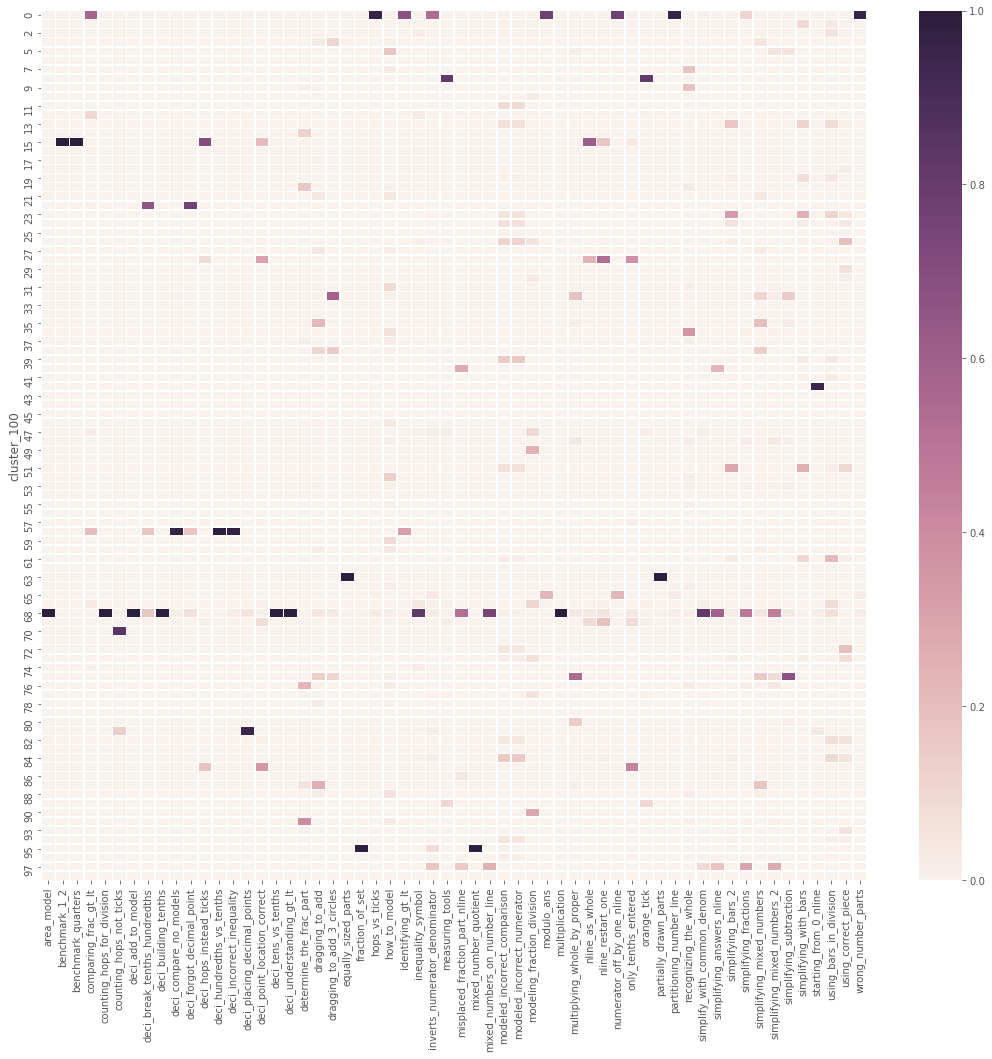

In [104]:
fig = plt.figure(figsize=(18.5, 16))
cmap = sns.cubehelix_palette(light=.95, as_cmap=True)
sns.heatmap(df_traits_norm, cmap=cmap,  linewidths=.5)

#sns.heatmap(df_traits_norm, cmap="YlGnBu",  linewidths=.5)

In [105]:
df_traits_norm.shape

(96, 58)

In [106]:
fig.savefig('heat_map2.png')


In [107]:
df_traits.to_csv('cluster_100.csv')

In [108]:
df_traits2 = pd.concat([df3['percent_correct'].groupby(df3['cluster_100']).describe(), df_traits], axis=1)

In [109]:
df_traits2.to_csv('cluster_100_plus_correct.csv')

In [110]:
df_traits_dict = df_traits.to_dict(orient='dict')

In [111]:
df_traits_dict

{'area_model': {0: 0,
  1: 0,
  2: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 0,
  21: 0,
  22: 0,
  23: 0,
  24: 0,
  25: 0,
  26: 0,
  27: 0,
  28: 0,
  29: 0,
  30: 0,
  31: 0,
  32: 0,
  33: 0,
  34: 0,
  35: 0,
  36: 0,
  37: 0,
  38: 0,
  39: 0,
  40: 0,
  41: 0,
  42: 0,
  43: 0,
  44: 0,
  45: 0,
  46: 0,
  47: 0,
  48: 0,
  49: 0,
  50: 0,
  51: 0,
  52: 0,
  53: 0,
  54: 0,
  55: 0,
  56: 0,
  57: 0,
  58: 0,
  59: 0,
  60: 0,
  61: 0,
  62: 0,
  63: 0,
  64: 0,
  65: 0,
  66: 0,
  68: 111,
  69: 0,
  70: 0,
  71: 0,
  72: 0,
  73: 0,
  74: 0,
  75: 0,
  76: 0,
  77: 0,
  78: 0,
  79: 0,
  80: 0,
  81: 0,
  82: 0,
  83: 0,
  84: 0,
  85: 0,
  86: 0,
  87: 0,
  88: 0,
  89: 0,
  90: 0,
  91: 0,
  93: 0,
  94: 0,
  95: 0,
  96: 0,
  97: 0,
  98: 0},
 'benchmark_1_2': {0: 0,
  1: 0,
  2: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  1

In [112]:
df_traits_dict2 = {}
cluster_with_no_trait = list(np.arange(100))
cluster_with_lt_10_trait = list(np.arange(100))

In [113]:
for trait in df_traits_dict:
    #print (idx, trait)
    df_traits_dict2[trait] = {}
    for cluster in df_traits_dict[trait]:
        #print (trait, cluster, df_traits_dict[trait][cluster])
        if  df_traits_dict[trait][cluster] > 0:
            df_traits_dict2[trait][cluster] = df_traits_dict[trait][cluster]
            if cluster in cluster_with_no_trait:
                cluster_with_no_trait.remove(cluster)
            if  df_traits_dict[trait][cluster] > 9:
                if cluster in cluster_with_lt_10_trait:
                    cluster_with_lt_10_trait.remove(cluster)

In [114]:
print (df_traits_dict2)

{'area_model': {68: 111}, 'benchmark_1_2': {15: 83}, 'benchmark_quarters': {15: 433}, 'comparing_frac_gt_lt': {0: 1394, 2: 9, 10: 9, 12: 258, 13: 1, 16: 11, 19: 2, 22: 28, 24: 2, 26: 9, 29: 8, 34: 1, 39: 1, 47: 42, 54: 4, 57: 1, 58: 498, 60: 1, 61: 3, 62: 8, 66: 84, 68: 11, 73: 4, 74: 24, 77: 9, 82: 6, 84: 5, 88: 2, 90: 1, 98: 2}, 'counting_hops_for_division': {68: 151}, 'counting_hops_not_ticks': {68: 116, 70: 5212, 81: 838}, 'deci_add_to_model': {68: 500}, 'deci_break_tenths_hundredths': {22: 674, 58: 175, 68: 175}, 'deci_building_tenths': {68: 298}, 'deci_compare_no_models': {5: 2, 17: 1, 32: 3, 48: 1, 58: 480, 68: 7, 75: 1}, 'deci_forgot_decimal_point': {22: 925, 58: 212, 68: 81}, 'deci_hops_instead_ticks': {15: 1031, 23: 1, 26: 2, 28: 123, 57: 8, 61: 5, 66: 1, 68: 5, 69: 18, 73: 1, 82: 3, 85: 269, 96: 2}, 'deci_hundredths_vs_tenths': {58: 770, 68: 1}, 'deci_incorrect_inequality': {58: 5174, 68: 84}, 'deci_placing_decimal_points': {68: 97, 81: 1810}, 'deci_point_location_correct': 

In [115]:
cluster_with_no_trait, 

([3, 6, 50, 67, 71, 92, 99],)

In [116]:
len(cluster_with_no_trait)

7

In [117]:
len(cluster_with_lt_10_trait)

13

In [118]:
x = list(df_traits.index)

In [119]:
df_traits.shape

(96, 58)

In [120]:
y = df_traits.sum(axis=1)

In [121]:
y

cluster_100
0     31293
1       239
2       310
4       493
5      3937
6         0
7      1794
8      5762
9      1196
10       58
11      558
12      575
13      879
14      124
15     2564
16       80
17      113
18       38
19      211
20      435
21     1141
22     1627
23     1489
24      712
25       14
26     1108
27      723
28     1252
29       59
30       67
      ...  
68    19075
69      452
70     5353
71        0
72      402
73      308
74      257
75     2806
76      848
77      184
78      352
79      101
80      229
81     3340
82      370
83       35
84     1405
85      864
86       82
87     1447
88     1549
89      744
90       45
91      813
93       53
94      399
95     3739
96      108
97     5180
98       68
Length: 96, dtype: int64

<Container object of 96 artists>

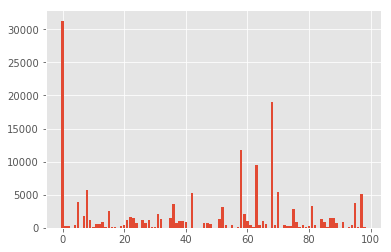

In [122]:

plt.bar( x, y)


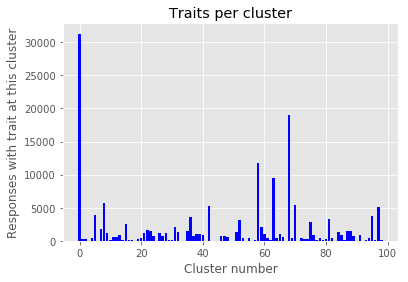

In [123]:
fig, ax = plt.subplots()

rects1 = ax.bar(x, y, color='b')
ax.set_xlabel('Cluster number')
ax.set_ylabel('Responses with trait at this cluster')
ax.set_title('Traits per cluster')



In [124]:
counts_per_cluster = np.bincount(km.labels_)

In [125]:
print (counts_per_cluster)

[55525  1105  4141     0   537  6476   725  4512  3239  7436  9493  5460
  2326  1980  8879  6268   558  1238  1005   624  1536  2767  3681  7281
  5502  3161  6861  2828 10346  2227   804  4891  2079  4057   281  3254
  6517  1264  1210  1452 18638  1191  6929  1214  1246  1890  1699  2313
  3861  1883  2534  3600  7351  1948  2315  1560  4988  1867 13349  2381
  1991  1481   690  5168  5875  1704  7239     0 66243  4976  6206  5047
  7981  2796  1077  5667  4263  6362  2850   505  3004 17737  3695  1018
  4404  1052   988  3196  3678  7224  8509  1331     0  3156  1898 11025
   461  9420  3800]


In [126]:
counts_per_cluster = list(counts_per_cluster)

In [127]:
counts_per_cluster = [x for x in counts_per_cluster if x != 0]

In [128]:
counts_per_cluster = np.array(counts_per_cluster)

In [129]:
y1 = y / counts_per_cluster

In [130]:
y

cluster_100
0     31293
1       239
2       310
4       493
5      3937
6         0
7      1794
8      5762
9      1196
10       58
11      558
12      575
13      879
14      124
15     2564
16       80
17      113
18       38
19      211
20      435
21     1141
22     1627
23     1489
24      712
25       14
26     1108
27      723
28     1252
29       59
30       67
      ...  
68    19075
69      452
70     5353
71        0
72      402
73      308
74      257
75     2806
76      848
77      184
78      352
79      101
80      229
81     3340
82      370
83       35
84     1405
85      864
86       82
87     1447
88     1549
89      744
90       45
91      813
93       53
94      399
95     3739
96      108
97     5180
98       68
Length: 96, dtype: int64

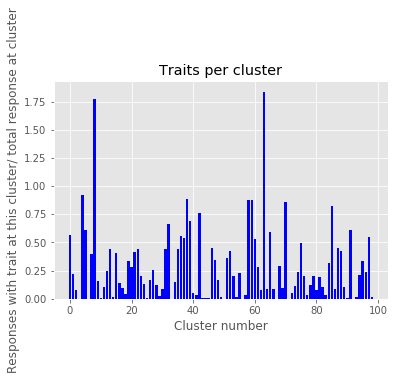

In [131]:
fig, ax = plt.subplots()

rects1 = ax.bar(x, y1, color='b')
ax.set_xlabel('Cluster number')
ax.set_ylabel('Responses with trait at this cluster/ total response at cluster')
ax.set_title('Traits per cluster')

In [132]:
df_traits2

,count,mean,std,min,25%,50%,75%,max,area_model,benchmark_1_2,...,simplifying_bars_2,simplifying_fractions,simplifying_mixed_numbers,simplifying_mixed_numbers_2,simplifying_subtraction,simplifying_with_bars,starting_from_0_nline,using_bars_in_division,using_correct_piece,wrong_number_parts
cluster_100,,,,,,,,,,,,,,,,,,,,,
0,55525.0,0.784658,0.238557,0.0,0.714286,0.800000,1.000000,1.0,0,0,...,0,44,0,2,0,0,0,0,0,3366
1,1105.0,0.855369,0.197927,0.0,0.800000,0.888889,1.000000,1.0,0,0,...,0,0,0,0,0,111,0,7,4,0
2,4141.0,0.786624,0.230810,0.0,0.714286,0.800000,1.000000,1.0,0,0,...,3,0,0,1,0,0,0,10,4,0
4,537.0,0.812526,0.217235,0.0,0.750000,0.875000,1.000000,1.0,0,0,...,0,0,149,0,0,0,0,0,0,0
5,6476.0,0.846596,0.195934,0.0,0.800000,0.875000,1.000000,1.0,0,0,...,0,1,8,46,66,0,0,0,0,0
6,725.0,0.854716,0.209218,0.0,0.800000,1.000000,1.000000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4512.0,0.799815,0.233332,0.0,0.750000,0.866071,1.000000,1.0,0,0,...,0,0,1,2,0,0,0,0,0,0
8,3239.0,0.846519,0.184804,0.0,0.800000,0.857143,1.000000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,7436.0,0.810567,0.234694,0.0,0.777778,0.888889,1.000000,1.0,0,0,...,0,0,9,0,0,0,0,0,0,0


In [133]:
df_trait_dict = df_traits.transpose().to_dict()

In [134]:
df_trait_dict_new = defaultdict()
for cluster in df_trait_dict:
    print (cluster,df_trait_dict[cluster])
    df_trait_dict_new[cluster] = defaultdict()
    for trait in df_trait_dict[cluster]:
        print (trait, df_trait_dict[cluster][trait])
        if df_trait_dict[cluster][trait] != 0:
            df_trait_dict_new[cluster][trait] = df_trait_dict[cluster][trait]
        

0 {'area_model': 0, 'benchmark_1_2': 0, 'benchmark_quarters': 0, 'comparing_frac_gt_lt': 1394, 'counting_hops_for_division': 0, 'counting_hops_not_ticks': 0, 'deci_add_to_model': 0, 'deci_break_tenths_hundredths': 0, 'deci_building_tenths': 0, 'deci_compare_no_models': 0, 'deci_forgot_decimal_point': 0, 'deci_hops_instead_ticks': 0, 'deci_hundredths_vs_tenths': 0, 'deci_incorrect_inequality': 0, 'deci_placing_decimal_points': 0, 'deci_point_location_correct': 0, 'deci_tens_vs_tenths': 0, 'deci_understanding_gt_lt': 0, 'determine_the_frac_part': 0, 'dragging_to_add': 0, 'dragging_to_add_3_circles': 0, 'equally_sized_parts': 0, 'fraction_of_set': 0, 'hops_vs_ticks': 1349, 'how_to_model': 0, 'identifying_gt_lt': 9202, 'inequality_symbol': 0, 'inverts_numerator_denominator': 12384, 'measuring_tools': 0, 'misplaced_fraction_part_nline': 5, 'mixed_number_quotient': 0, 'mixed_numbers_on_number_line': 3, 'modeled_incorrect_comparison': 0, 'modeled_incorrect_numerator': 0, 'modeling_fraction_di

In [135]:
df_trait_dict_new

defaultdict(None,
            {0: defaultdict(None,
                         {'comparing_frac_gt_lt': 1394,
                          'hops_vs_ticks': 1349,
                          'identifying_gt_lt': 9202,
                          'inverts_numerator_denominator': 12384,
                          'misplaced_fraction_part_nline': 5,
                          'mixed_numbers_on_number_line': 3,
                          'modulo_ans': 81,
                          'numerator_off_by_one_nline': 81,
                          'partitioning_number_line': 3366,
                          'simplify_with_common_denom': 11,
                          'simplifying_answers_nline': 5,
                          'simplifying_fractions': 44,
                          'simplifying_mixed_numbers_2': 2,
                          'wrong_number_parts': 3366}),
             1: defaultdict(None,
                         {'deci_point_location_correct': 1,
                          'inverts_numerator_denominat

In [178]:
sums = df_traits.sum()

In [179]:
df_traits_pct = df_traits/sums * 100.0

In [180]:
df_traits_pct = df_traits_pct.applymap( lambda x:'{0:.1f}'.format(x))

In [181]:
df_traits_pct

,area_model,benchmark_1_2,benchmark_quarters,comparing_frac_gt_lt,counting_hops_for_division,counting_hops_not_ticks,deci_add_to_model,deci_break_tenths_hundredths,deci_building_tenths,deci_compare_no_models,...,simplifying_bars_2,simplifying_fractions,simplifying_mixed_numbers,simplifying_mixed_numbers_2,simplifying_subtraction,simplifying_with_bars,starting_from_0_nline,using_bars_in_division,using_correct_piece,wrong_number_parts
cluster_100,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,57.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.3,0.0,0.2,0.0,0.0,0.0,0.0,0.0,95.8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.3,0.0,4.1,0.6,0.0
2,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,0.0,0.1,0.0,0.0,0.0,5.9,0.6,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,...,0.0,0.3,0.3,5.3,5.3,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
df_traits_pct_dict = df_traits_pct.transpose().to_dict()

In [183]:
df_traits_pct_dict_new = defaultdict()

In [186]:
for cluster in df_traits_pct_dict:
    #print (cluster,df_traits_pct_dict[cluster])
    df_traits_pct_dict_new[cluster] = defaultdict()
    for trait in df_traits_pct_dict[cluster]:
        # print (trait, df_traits_pct_dict[cluster][trait])
        if float(df_traits_pct_dict[cluster][trait]) > 5:
            df_traits_pct_dict_new[cluster][trait] = df_traits_pct_dict[cluster][trait]
        

In [187]:
df_traits_pct_dict_new

defaultdict(None,
            {0: defaultdict(None,
                         {'comparing_frac_gt_lt': '57.2',
                          'hops_vs_ticks': '96.5',
                          'identifying_gt_lt': '67.3',
                          'inverts_numerator_denominator': '53.2',
                          'modulo_ans': '77.1',
                          'numerator_off_by_one_nline': '77.1',
                          'partitioning_number_line': '95.8',
                          'simplifying_fractions': '11.3',
                          'wrong_number_parts': '95.8'}),
             1: defaultdict(None, {'simplifying_with_bars': '9.3'}),
             2: defaultdict(None, {'using_bars_in_division': '5.9'}),
             4: defaultdict(None, {'dragging_to_add_3_circles': '10.8'}),
             5: defaultdict(None,
                         {'how_to_model': '16.8',
                          'simplifying_mixed_numbers_2': '5.3',
                          'simplifying_subtraction': '5.3'}),
   